# Brain Tumor Segmentation

In [1]:
import scipy.io
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pandas as pd

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
from PIL import Image

In [3]:
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler

In [4]:
#DIRECTORY = "Figshare Brain Tumor Dataset/all data/images"
#files = list()
#for i in range(len(os.listdir(DIRECTORY))):
    #files.append(DIRECTORY + os.listdir("Figshare Brain Tumor Dataset/all data/images")[i])

In [5]:
images = tf.keras.utils.image_dataset_from_directory("Figshare Brain Tumor Dataset/all data/images", labels=None, image_size=(512, 512), batch_size=1)

Found 3064 files belonging to 1 classes.


In [6]:
masks = tf.keras.utils.image_dataset_from_directory("Figshare Brain Tumor Dataset/all data/masks", labels=None, image_size=(512, 512), color_mode='grayscale', batch_size=1)

Found 3064 files belonging to 1 classes.


In [7]:
dataset = tf.data.Dataset.zip((images, masks))

In [8]:
#def normalize_image(image, label):
    #return tf.divide(image,255.), tf.divide(label,255.)

In [9]:
#dataset = dataset.map(normalize_image)

In [10]:
train_data = dataset.take(2800)
test_data = dataset.skip(2800)

In [11]:
train_data

<TakeDataset element_spec=(TensorSpec(shape=(None, 512, 512, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 512, 512, 1), dtype=tf.float32, name=None))>

In [12]:
#for a, c in test_data.take(10):
    #plt.imshow(a[0])
    #plt.imshow(c[0], cmap='gray')
    #plt.show()

In [13]:
#test_data.take(1)

In [14]:
base_model = tf.keras.applications.ConvNeXtTiny(include_top=False, input_shape=(512, 512, 3))

In [15]:
base_model.trainable = False

In [16]:
base_model.summary(expand_nested=True)

Model: "convnext_tiny"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 convnext_tiny_prestem_normaliz  (None, 512, 512, 3)  0          ['input_1[0][0]']                
 ation (Normalization)                                                                            
                                                                                                  
 convnext_tiny_stem (Sequential  (None, 128, 128, 96  4896       ['convnext_tiny_prestem_normaliza
 )                              )                                tion[0][0]']         

 convnext_tiny_stage_0_block_2_  (None, 128, 128, 96  96         ['convnext_tiny_stage_0_block_2_p
 layer_scale (LayerScale)       )                                ointwise_conv_2[0][0]']          
                                                                                                  
 convnext_tiny_stage_0_block_2_  (None, 128, 128, 96  0          ['convnext_tiny_stage_0_block_2_l
 identity (Activation)          )                                ayer_scale[0][0]']               
                                                                                                  
 tf.__operators__.add_2 (TFOpLa  (None, 128, 128, 96  0          ['tf.__operators__.add_1[0][0]', 
 mbda)                          )                                 'convnext_tiny_stage_0_block_2_i
                                                                 dentity[0][0]']                  
                                                                                                  
 convnext_

 pointwise_conv_2 (Dense)                                        elu[0][0]']                      
                                                                                                  
 convnext_tiny_stage_1_block_2_  (None, 64, 64, 192)  192        ['convnext_tiny_stage_1_block_2_p
 layer_scale (LayerScale)                                        ointwise_conv_2[0][0]']          
                                                                                                  
 convnext_tiny_stage_1_block_2_  (None, 64, 64, 192)  0          ['convnext_tiny_stage_1_block_2_l
 identity (Activation)                                           ayer_scale[0][0]']               
                                                                                                  
 tf.__operators__.add_5 (TFOpLa  (None, 64, 64, 192)  0          ['tf.__operators__.add_4[0][0]', 
 mbda)                                                            'convnext_tiny_stage_1_block_2_i
          

                                                                                                  
 convnext_tiny_stage_2_block_2_  (None, 32, 32, 384)  590208     ['convnext_tiny_stage_2_block_2_g
 pointwise_conv_2 (Dense)                                        elu[0][0]']                      
                                                                                                  
 convnext_tiny_stage_2_block_2_  (None, 32, 32, 384)  384        ['convnext_tiny_stage_2_block_2_p
 layer_scale (LayerScale)                                        ointwise_conv_2[0][0]']          
                                                                                                  
 convnext_tiny_stage_2_block_2_  (None, 32, 32, 384)  0          ['convnext_tiny_stage_2_block_2_l
 identity (Activation)                                           ayer_scale[0][0]']               
                                                                                                  
 tf.__oper

 identity (Activation)                                           ayer_scale[0][0]']               
                                                                                                  
 tf.__operators__.add_11 (TFOpL  (None, 32, 32, 384)  0          ['tf.__operators__.add_10[0][0]',
 ambda)                                                           'convnext_tiny_stage_2_block_5_i
                                                                 dentity[0][0]']                  
                                                                                                  
 convnext_tiny_stage_2_block_6_  (None, 32, 32, 384)  19200      ['tf.__operators__.add_11[0][0]']
 depthwise_conv (Conv2D)                                                                          
                                                                                                  
 convnext_tiny_stage_2_block_6_  (None, 32, 32, 384)  768        ['convnext_tiny_stage_2_block_6_d
 layernorm

|¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯|
| convnext_tiny_downsampling_lay  (None, 32, 32, 384)  768      []                               |
| ernorm_2 (LayerNormalization)                                                                  |
|                                                                                                |
| convnext_tiny_downsampling_con  (None, 16, 16, 768)  1180416  []                               |
| v_2 (Conv2D)                                                                                   |
¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯
 convnext_tiny_stage_3_block_0_  (None, 16, 16, 768)  38400      ['convnext_tiny_downsampling_bloc
 depthwise_conv (Conv2D)                                         k_2[0][0]']                      
                                                                                                  
 convnext_

 layer_normalization (LayerNorm  (None, 16, 16, 768)  1536       ['tf.__operators__.add_17[0][0]']
 alization)                                                                                       
                                                                                                  
Total params: 27,820,128
Trainable params: 0
Non-trainable params: 27,820,128
__________________________________________________________________________________________________


In [17]:
skip_activations = [
    "tf.__operators__.add_2",
    "tf.__operators__.add_5",
    "tf.__operators__.add_14",
    "tf.__operators__.add_17"
    
]

In [18]:
base_model_outputs = [base_model.get_layer(name).output for name in skip_activations]

In [19]:
base_model_outputs

[<KerasTensor: shape=(None, 128, 128, 96) dtype=float32 (created by layer 'tf.__operators__.add_2')>,
 <KerasTensor: shape=(None, 64, 64, 192) dtype=float32 (created by layer 'tf.__operators__.add_5')>,
 <KerasTensor: shape=(None, 32, 32, 384) dtype=float32 (created by layer 'tf.__operators__.add_14')>,
 <KerasTensor: shape=(None, 16, 16, 768) dtype=float32 (created by layer 'tf.__operators__.add_17')>]

In [20]:
class LayerScale(Layer):
    """Layer scale module.
    References:
      - https://arxiv.org/abs/2103.17239
    Args:
      init_values (float): Initial value for layer scale. Should be within
        [0, 1].
      projection_dim (int): Projection dimensionality.
    Returns:
      Tensor multiplied to the scale.
    """

    def __init__(self, init_values, projection_dim, **kwargs):
        super().__init__(**kwargs)
        self.init_values = init_values
        self.projection_dim = projection_dim

    def build(self, input_shape):
        self.gamma = tf.Variable(
            self.init_values * tf.ones((self.projection_dim,))
        )

    def call(self, x):
        return x * self.gamma

    def get_config(self):
        config = super().get_config()
        config.update(
            {
                "init_values": self.init_values,
                "projection_dim": self.projection_dim,
            }
        )
        return config

In [21]:
def ConvNeXtBlock(projection_dim,  inputs, drop_path_rate=0.0, layer_scale_init_value=1e-6):
    x = inputs

    x = Conv2D(
        filters=projection_dim,
        kernel_size=7,
        padding="same",
        groups=projection_dim)(x)

    x = LayerNormalization(epsilon=1e-6)(x)
    x = Dense(4 * projection_dim)(x)
    x = Activation("gelu")(x)
    x = Dense(projection_dim)(x)

    if layer_scale_init_value is not None:
        x = LayerScale(
            layer_scale_init_value,
            projection_dim,
        )(x)
    if drop_path_rate:
        layer = StochasticDepth(
            drop_path_rate)
    else:
        layer = Activation("linear")

    return inputs + layer(x)

In [22]:
def DecoderBlock(prev_layer_input, skip_layer_input, n_filters):
    """
    Decoder Block first uses transpose convolution to upscale the image to a bigger size and then,
    merges the result with skip layer results from encoder block
    Adding 2 convolutions with 'same' padding helps further increase the depth of the network for better predictions
    The function returns the decoded layer output
    """
    # Start with a transpose convolution layer to first increase the size of the image
    up = Conv2DTranspose(
                 n_filters,
                 (3,3),    # Kernel size
                 strides=(2,2),
                 padding='same')(prev_layer_input)

    # Merge the skip connection from previous block to prevent information loss
    merge = concatenate([up, skip_layer_input], axis=3)
    
    # Add 2 Conv Layers with relu activation and HeNormal initialization for further processing
    # The parameters for the function are similar to encoder
    conv = ConvNeXtBlock(n_filters * 2, merge)
    return conv

In [23]:
def UNetCompiled(input_size=(512, 512, 3)):
    # Input size represent the size of 1 image (the size used for pre-processing) 
    
    #inputs = Input(input_size)
    #encoder = base_model(inputs)
    
    # Decoder includes multiple mini blocks with decreasing number of filters
    # Observe the skip connections from the encoder are given as input to the decoder
    # Recall the 2nd output of encoder block was skip connection, hence cblockn[1] is used
    ublock6 = DecoderBlock(base_model.output, base_model_outputs[2],  384)
    ublock7 = DecoderBlock(ublock6, base_model_outputs[1],  192)
    ublock8 = DecoderBlock(ublock7, base_model_outputs[0], 96)
    ublock9 = Conv2DTranspose(96, (5, 5), (4, 4), "same")(ublock8)

    # Complete the model with 1 3x3 convolution layer (Same as the prev Conv Layers)
    # Followed by a 1x1 Conv layer to get the image to the desired size. 
    # Observe the number of channels will be equal to number of output classes
    conv9 = Conv2D(96, 3, padding='same')(ublock9)

    conv10 = Conv2D(1, 1, padding='same', activation='relu')(conv9)
    
    # Define the model
    model = tf.keras.Model(inputs=base_model.input, outputs=conv10)

    return model

In [24]:
convnext_unet = UNetCompiled()

In [25]:
convnext_unet.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 convnext_tiny_prestem_normaliz  (None, 512, 512, 3)  0          ['input_1[0][0]']                
 ation (Normalization)                                                                            
                                                                                                  
 convnext_tiny_stem (Sequential  (None, 128, 128, 96  4896       ['convnext_tiny_prestem_normaliza
 )                              )                                tion[0][0]']                 

 tf.__operators__.add_2 (TFOpLa  (None, 128, 128, 96  0          ['tf.__operators__.add_1[0][0]', 
 mbda)                          )                                 'convnext_tiny_stage_0_block_2_i
                                                                 dentity[0][0]']                  
                                                                                                  
 convnext_tiny_downsampling_blo  (None, 64, 64, 192)  74112      ['tf.__operators__.add_2[0][0]'] 
 ck_0 (Sequential)                                                                                
                                                                                                  
 convnext_tiny_stage_1_block_0_  (None, 64, 64, 192)  9600       ['convnext_tiny_downsampling_bloc
 depthwise_conv (Conv2D)                                         k_0[0][0]']                      
                                                                                                  
 convnext_

 convnext_tiny_downsampling_blo  (None, 32, 32, 384)  295680     ['tf.__operators__.add_5[0][0]'] 
 ck_1 (Sequential)                                                                                
                                                                                                  
 convnext_tiny_stage_2_block_0_  (None, 32, 32, 384)  19200      ['convnext_tiny_downsampling_bloc
 depthwise_conv (Conv2D)                                         k_1[0][0]']                      
                                                                                                  
 convnext_tiny_stage_2_block_0_  (None, 32, 32, 384)  768        ['convnext_tiny_stage_2_block_0_d
 layernorm (LayerNormalization)                                  epthwise_conv[0][0]']            
                                                                                                  
 convnext_tiny_stage_2_block_0_  (None, 32, 32, 1536  591360     ['convnext_tiny_stage_2_block_0_l
 pointwise

 layernorm (LayerNormalization)                                  epthwise_conv[0][0]']            
                                                                                                  
 convnext_tiny_stage_2_block_3_  (None, 32, 32, 1536  591360     ['convnext_tiny_stage_2_block_3_l
 pointwise_conv_1 (Dense)       )                                ayernorm[0][0]']                 
                                                                                                  
 convnext_tiny_stage_2_block_3_  (None, 32, 32, 1536  0          ['convnext_tiny_stage_2_block_3_p
 gelu (Activation)              )                                ointwise_conv_1[0][0]']          
                                                                                                  
 convnext_tiny_stage_2_block_3_  (None, 32, 32, 384)  590208     ['convnext_tiny_stage_2_block_3_g
 pointwise_conv_2 (Dense)                                        elu[0][0]']                      
          

 convnext_tiny_stage_2_block_6_  (None, 32, 32, 384)  590208     ['convnext_tiny_stage_2_block_6_g
 pointwise_conv_2 (Dense)                                        elu[0][0]']                      
                                                                                                  
 convnext_tiny_stage_2_block_6_  (None, 32, 32, 384)  384        ['convnext_tiny_stage_2_block_6_p
 layer_scale (LayerScale)                                        ointwise_conv_2[0][0]']          
                                                                                                  
 convnext_tiny_stage_2_block_6_  (None, 32, 32, 384)  0          ['convnext_tiny_stage_2_block_6_l
 identity (Activation)                                           ayer_scale[0][0]']               
                                                                                                  
 tf.__operators__.add_12 (TFOpL  (None, 32, 32, 384)  0          ['tf.__operators__.add_11[0][0]',
 ambda)   

                                                                                                  
 convnext_tiny_stage_3_block_0_  (None, 16, 16, 768)  0          ['convnext_tiny_stage_3_block_0_l
 identity (Activation)                                           ayer_scale[0][0]']               
                                                                                                  
 tf.__operators__.add_15 (TFOpL  (None, 16, 16, 768)  0          ['convnext_tiny_downsampling_bloc
 ambda)                                                          k_2[0][0]',                      
                                                                  'convnext_tiny_stage_3_block_0_i
                                                                 dentity[0][0]']                  
                                                                                                  
 convnext_tiny_stage_3_block_1_  (None, 16, 16, 768)  38400      ['tf.__operators__.add_15[0][0]']
 depthwise

 activation_1 (Activation)      (None, 32, 32, 768)  0           ['layer_scale[0][0]']            
                                                                                                  
 tf.__operators__.add_18 (TFOpL  (None, 32, 32, 768)  0          ['concatenate[0][0]',            
 ambda)                                                           'activation_1[0][0]']           
                                                                                                  
 conv2d_transpose_1 (Conv2DTran  (None, 64, 64, 192)  1327296    ['tf.__operators__.add_18[0][0]']
 spose)                                                                                           
                                                                                                  
 concatenate_1 (Concatenate)    (None, 64, 64, 384)  0           ['conv2d_transpose_1[0][0]',     
                                                                  'tf.__operators__.add_5[0][0]'] 
          

In [26]:
convnext_unet.compile(optimizer=SGD(learning_rate=0.01, momentum=0.05), loss=tf.keras.losses.BinaryCrossentropy())

In [43]:
convnext_unet.fit(train_data, epochs=2)

Epoch 1/2
2489/2800 [=========================>....] - ETA: 1:25 - loss: 8.3324

KeyboardInterrupt: 

In [54]:
img = Image.open('Figshare Brain Tumor Dataset/all data/masks/1.jpg')

In [55]:
img = img.convert('RGB')

In [56]:
img = np.array(img)

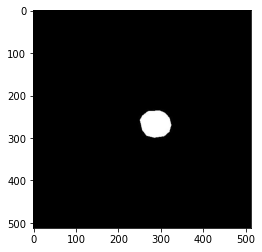

In [57]:
plt.imshow(img)

1/1 [==============================] - 0s 158ms/step


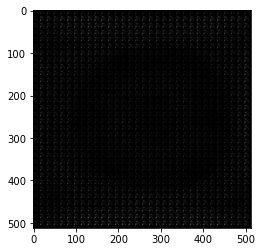

In [53]:
plt.imshow(convnext_unet.predict(np.array([img]))[0], cmap='gray')